### Helper Methods for getting data

- The functions are described in their corresponding docstring 
- Each serving a different purpose to get or extract different types of data

In [14]:
from time import sleep
import pandas as pd
import numpy as np
import jikanpy as jikan
from collections import Counter

jikan = jikan.Jikan()


def get_anime_data(anime_id):
    """
    Gets the data for a given anime id
    Parameters:
    anime_id: int

    Returns:
    df: DataFrame with anime data
    """
    anime = jikan.anime(anime_id)
    df = pd.DataFrame.from_dict(anime)
    return df


def get_popular_anime():
    """
    Gets the popular anime from the Jikan API / MAL Database

    Returns:
    popular_anime: Dict containting the popular anime from the first page (25 entries)
    """
    popular_anime = jikan.top(type="anime", parameters={"filter": "bypopularity"})
    return popular_anime


def get_top_manga():
    """
    Gets the top current manga from the Jikan API / MAL Database

    Returns:
    top_manga: Dict containting the top manga from the first page (25 entries)
    """
    top_manga = jikan.top(type="manga")
    return top_manga


def get_top_anime():
    """
    Gets the top current anime from the Jikan API / MAL Database

    Returns:
    top_anime: Dict containting the top anime from the first page (25 entries)
    """ """"""
    top_anime = jikan.top(type="anime")
    return top_anime


def extract_top_anime_names(top_anime):
    """
    Extracts the names of the top anime from the top anime data

    Parameters:
    top_anime: dict

    Returns:
    df: DataFrame with anime names
    """
    df = pd.DataFrame(top_anime["data"])["title_english"]
    return df


def extract_top_manga_names(top_manga):
    """
    Extracts the names of the top manga from the top manga data

    Parameters:
    top_anime: dict

    Returns:
    df: DataFrame with anime names
    """
    df = pd.DataFrame(top_manga["data"])["title"]
    return df


def extract_top_manga_scoring(top_manga):
    """
    Extracts the names of the top manga from the top manga data

    Parameters:
    top_anime: dict

    Returns:
    df: DataFrame with anime names
    """
    df = pd.DataFrame(top_manga["data"])["score"]
    return df


def extract_top_anime_scoring(top_anime):
    """
    Extracts the scores of the top anime from the top anime data

    Parameters:
    top_anime: dict

    Returns:
    df: DataFrame with anime scores
    """
    df = pd.DataFrame(top_anime["data"])["score"]
    return df


def return_top_anime_top_manga_with_score(amount=10):
    """
    Returns a DataFrame with the top anime and manga with their respective scores

    Parameters:
    amount: int, default 10

    Returns:
    df: DataFrame with top anime and manga with scores
    """
    top_anime = get_top_anime()
    top_manga = get_top_manga()
    df = pd.DataFrame()
    top_anime_names = extract_top_anime_names(top_anime)[0:amount]
    top_anime_scores = extract_top_anime_scoring(top_anime)[0:amount]
    top_manga_names = extract_top_manga_names(top_manga)[0:amount]
    top_manga_scores = extract_top_manga_scoring(top_manga)[0:amount]
    df = pd.concat(
        [top_anime_names, top_anime_scores, top_manga_names, top_manga_scores], axis=1
    )
    df.columns = ["Top Anime", "Top Anime Score", "Top Manga", "Top Manga Score"]
    return df


def get_review_texts(anime_id, num_pages=5):
    """
    Gets the review texts for a given anime id

    Parameters:
    anime_id: int
    num_pages: int, default 5 pages

    Returns:
    df: DataFrame with review texts
    """
    df = pd.DataFrame()
    for i in range(1, num_pages):
        review = jikan.anime(anime_id, extension="reviews", page=i)
        if review["data"] == []:
            break  # data equals empty list if there are no more reviews
        else:
            sleep(2)  # to prevent rate limiting
        new_data = pd.DataFrame.from_dict(review["data"])["review"]
        df = pd.concat([df, new_data], ignore_index=True)
    return df


def get_top_popular_demographics():
    num_pages = 10
    demographic_names_popular = []
    demographic_names_top = []
    total_titles = 0
    for i in range(1, num_pages):
        top_anime = pd.DataFrame(jikan.top(type="anime", page=i)["data"])
        sleep(2)  # to prevent rate limiting
        popular_anime = pd.DataFrame(
            jikan.top(type="anime", parameters={"filter": "bypopularity"}, page=i)[
                "data"
            ]
        )

        # getting demographics dicts, which are in a list
        top_anime_demographics = top_anime["demographics"]
        popular_anime_demographics = popular_anime["demographics"]

        # extracting list item, then extracting name from dict
        demographic_names_top = demographic_names_top + [
            x["name"] for item in top_anime_demographics for x in item
        ]
        demographic_names_popular = demographic_names_popular + [
            x["name"] for item in popular_anime_demographics for x in item
        ]
        total_titles += len(top_anime_demographics) + len(popular_anime_demographics)

    return (
        Counter(demographic_names_top),
        Counter(demographic_names_popular),
        total_titles,
    )


def get_top_popular_genres():
    num_pages = 10
    genre_names_popular = []
    genre_names_top = []
    total_titles = 0
    for i in range(1, num_pages):
        top_anime = pd.DataFrame(jikan.top(type="anime", page=i)["data"])
        # to prevent rate limiting
        sleep(2)
        popular_anime = pd.DataFrame(
            jikan.top(type="anime", parameters={"filter": "bypopularity"}, page=i)[
                "data"
            ]
        )
        # getting genres dicts, which are in a list
        top_anime_genres = top_anime["genres"]
        popular_anime_genres = popular_anime["genres"]

        # extracting list item, then extracting name from dict
        genre_names_top = genre_names_top + [
            x["name"] for item in top_anime_genres for x in item
        ]
        genre_names_popular = genre_names_popular + [
            x["name"] for item in popular_anime_genres for x in item
        ]
        total_titles += len(top_anime_genres) + len(popular_anime_genres)

    return (
        Counter(genre_names_top),
        Counter(genre_names_popular),
        total_titles,
    )

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn-v0_8-paper")

#### Getting the top 10 Anime and Manga with score

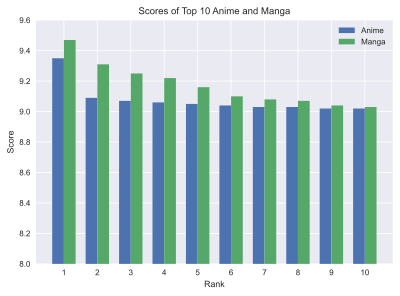

In [121]:
df_top_animanga = return_top_anime_top_manga_with_score(10)
df_top_animanga

# Assuming df_top_animanga is a DataFrame with columns 'anime_score' and 'manga_score'
anime_scores = df_top_animanga["Top Anime Score"]
manga_scores = df_top_animanga["Top Manga Score"]
anime_titles = df_top_animanga["Top Anime"]
manga_titles = df_top_animanga["Top Manga"]

# Create an array with the positions of each bar along the x-axis
x = np.arange(len(anime_scores))

# Create the bar chart
bar_width = 0.35
plt.bar(x - bar_width / 2, anime_scores, bar_width, label="Anime")
plt.bar(x + bar_width / 2, manga_scores, bar_width, label="Manga")

# Add title and labels
plt.title("Scores of Top 10 Anime and Manga")
plt.xlabel("Rank")
plt.ylabel("Score")
plt.xticks(x, range(1, len(anime_scores) + 1))  # Set x-tick labels to start from 1

# Add a legend
plt.legend()

# Set y-axis limit
plt.ylim(8, 9.6)

# Show the plot
plt.savefig("top_scores_bar.png", dpi=400)
plt.show()

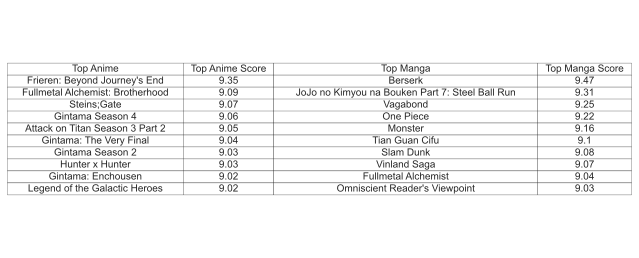

In [122]:
# https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib

# Create a new figure with a larger size
# fig, ax = plt.subplots(1, 1, figsize=(2, 2))

# Hide axes
# ax.axis("off")

# Create a table and add it to the figure
table = plt.table(
    cellText=df_top_animanga.values,
    colLabels=df_top_animanga.columns,
    cellLoc="center",
    loc="center",
)

# Auto scale the width of the columns
table.auto_set_column_width(col=list(range(len(df_top_animanga.columns))))

# Show the plot
plt.axis("off")
plt.savefig("top_scores_table.png", dpi=400)
plt.show()

#### Getting the mean of the top 10 manga and anime scores

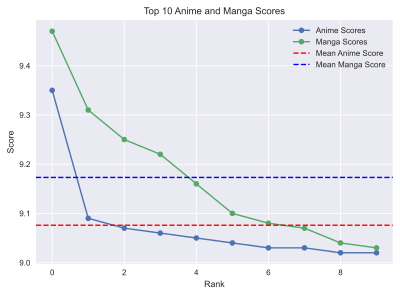

In [125]:
# Extract the top anime and manga scores
series_anime_scores = extract_top_anime_scoring(get_top_anime())[0:10]
series_manga_scores = extract_top_manga_scoring(get_top_manga())[0:10]

# Calculate the mean scores
mean_anime_score = series_anime_scores.mean()
mean_manga_score = series_manga_scores.mean()

# Create a new figure
fig = plt.figure()

# Plot the individual scores
plt.plot(series_anime_scores, marker="o", label="Anime Scores")
plt.plot(series_manga_scores, marker="o", label="Manga Scores")

# Add the mean scores as straight lines horizontal to x axis
plt.axhline(y=mean_anime_score, color="r", linestyle="--", label="Mean Anime Score")
plt.axhline(y=mean_manga_score, color="b", linestyle="--", label="Mean Manga Score")

# Add a legend
plt.legend()

# Add title and labels
plt.title("Top 10 Anime and Manga Scores")
plt.xlabel("Rank")
plt.ylabel("Score")

# Show the plot
plt.savefig("top_scores_line.png", dpi=400)
plt.show()

#### Are there more ratings on manga as compared to anime? (mean)

Top Anime mean scored by:  815412.6
Top Manga mean scored by:  152336.6


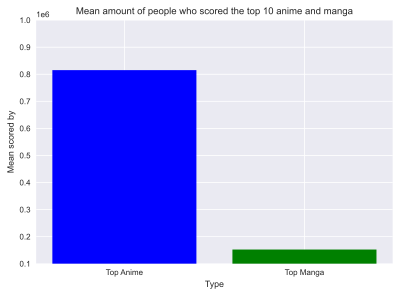

In [124]:
top_anime = pd.DataFrame(get_top_anime()["data"][0:10])["scored_by"].mean()
top_manga = pd.DataFrame(get_top_manga()["data"][0:10])["scored_by"].mean()
print("Top Anime mean scored by: ", top_anime)
print("Top Manga mean scored by: ", top_manga)

# Plot the scores
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Create a new figure
plt.style.use("seaborn-v0_8-paper")
fig = plt.figure()

plt.title("Mean amount of people who scored the top 10 anime and manga")
plt.xlabel("Type")
plt.ylabel("Mean scored by")
plt.bar(["Top Anime", "Top Manga"], [top_anime, top_manga], color=["b", "g"])
plt.ylim(100000, 1000000)

plt.savefig("top_scores_mean_scored_by.png", dpi=400)
plt.show()

### Popularity vs scoring

In [64]:
seasons = jikan.seasons(extension="now")
seasons

dataframe = pd.DataFrame(seasons["data"])
dataframe["title_english"]

0                                             One Piece
1     KonoSuba: God's Blessing on This Wonderful Wor...
2     Demon Slayer: Kimetsu no Yaiba Hashira Trainin...
3                                           Case Closed
4     Mushoku Tensei: Jobless Reincarnation Season 2...
5                                           Kaiju No. 8
6      That Time I Got Reincarnated as a Slime Season 3
7                             My Hero Academia Season 7
8                  Tsukimichi: Moonlit Fantasy Season 2
9                                                  None
10         Spice and Wolf: Merchant Meets the Wise Wolf
11           The Misfit of Demon King Academy II Part 2
12    An Archdemon's Dilemma: How to Love Your Elf B...
13    I Was Reincarnated as the 7th Prince so I Can ...
14                                Go! Go! Loser Ranger!
15    Chillin' in Another World with Level 2 Super C...
16          The Irregular at Magic High School Season 3
17                                        Date A

In [76]:
df = get_review_texts(5114, 3)
df

,0
0,"First of all, I have seen the original FMA and..."
1,Fullmetal Alchemist: Brotherhood gets an immen...
2,Adaptations have long been a thorn in the side...
3,Since I couldn't find any legitimate objective...
4,*Spoiler Warning Aside from the usual everyday...
5,I can't even watch the original FMA anime now ...
6,"Now, this is a prime example of how to adapt a..."
7,"""We're not gods, we're only human. We can't ev..."
8,"If one wishes to obtain something, something o..."
9,Full metal alchemist brotherhood the anime tha...


In [4]:
counts_top, counts_popular, total = get_top_popular_demographics()

In [34]:
top = pd.DataFrame(counts_top.items(), columns=["demographic", "count"])
popular = pd.DataFrame(counts_popular.items(), columns=["demographic", "count"])

plt.bar(top["demographic"], top["count"], color="b", label="Top Anime", alpha=0.5)
plt.bar(popular["demographic"], popular["count"], color="g", label="Popular Anime", alpha=0.5)
plt.title(f"Demographics of Top and Popular Anime \n With a total of {total} titles analyzed")
plt.ylim(3, 100)
plt.legend()
plt.show()


,demographic,count
0,Shounen,95
1,Seinen,23
2,Shoujo,10


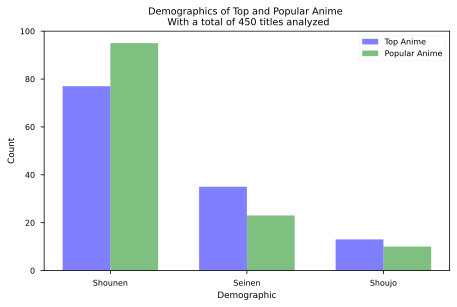

In [42]:
top = pd.DataFrame(counts_top.items(), columns=["demographic", "count"])[0:3]
popular = pd.DataFrame(counts_popular.items(), columns=["demographic", "count"])

n_groups = len(top)
index = np.arange(n_groups)
bar_width = 0.35

plt.bar(index, top["count"], bar_width, color="b", label="Top Anime", alpha=0.5)
plt.bar(index + bar_width, popular["count"], bar_width, color="g", label="Popular Anime", alpha=0.5)
plt.xlabel("Demographic")
plt.ylabel("Count")
plt.xticks(index + bar_width / 2, top["demographic"])
plt.title(
    f"Demographics of Top and Popular Anime \n With a total of {total} titles analyzed"
)
plt.tight_layout()
plt.ylim(0, 100)
plt.legend()
plt.show()

In [15]:
counts_top_genre, counts_popular_genre, total = get_top_popular_genres()

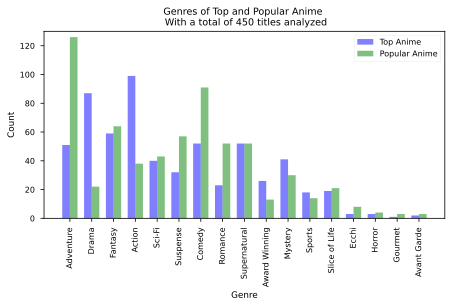

In [27]:
top = pd.DataFrame(counts_top_genre.items(), columns=["genre", "count"])
popular = pd.DataFrame(counts_popular_genre.items(), columns=["genre", "count"])

n_groups = len(top)
index = np.arange(n_groups)
bar_width = 0.35

plt.bar(index, top["count"], bar_width, color="b", label="Top Anime", alpha=0.5)
plt.bar(
    index + bar_width,
    popular["count"],
    bar_width,
    color="g",
    label="Popular Anime",
    alpha=0.5,
)

plt.xlabel("Genre")
plt.ylabel("Count")
plt.title(f"Genres of Top and Popular Anime \n With a total of {total} titles analyzed")
plt.xticks(index + bar_width / 2, top["genre"], rotation=90)
plt.legend()
plt.tight_layout()
plt.ylim(0, 130)
plt.show()